In [1]:
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings('ignore')

# 파일 불러오기
df = pd.read_excel("../데이터자료/Join_data.xlsx", index_col = 0)    
df = df.set_index("DateTime")

# 대비 계산
df['대비_irs_1Y'] = df['1Y_Mid_irs'] - df['1Y_Mid_irs'].shift(1) 
df['대비_irs_2Y'] = df['2Y_Mid_irs'] - df['2Y_Mid_irs'].shift(1) 
df['대비_irs_3Y'] = df['3Y_Mid_irs'] - df['3Y_Mid_irs'].shift(1) 
df['대비_irs_5Y'] = df['5Y_Mid_irs'] - df['5Y_Mid_irs'].shift(1) 
df['대비_irs_10Y'] = df['10Y_Mid_irs'] - df['10Y_Mid_irs'].shift(1) 

df['대비_crs_1Y'] = df['1Y_Mid_crs'] - df['1Y_Mid_crs'].shift(1)
df['대비_crs_2Y'] = df['2Y_Mid_crs'] - df['2Y_Mid_crs'].shift(1)
df['대비_crs_3Y'] = df['3Y_Mid_crs'] - df['3Y_Mid_crs'].shift(1)
df['대비_crs_5Y'] = df['5Y_Mid_crs'] - df['5Y_Mid_crs'].shift(1)
df['대비_crs_10Y'] = df['10Y_Mid_crs'] - df['10Y_Mid_crs'].shift(1)

df['대비_swapbasis_1Y'] = df['1Y_베이시스']-df['1Y_베이시스'].shift(1)
df['대비_swapbasis_2Y'] = df['2Y_베이시스']-df['2Y_베이시스'].shift(1)
df['대비_swapbasis_3Y'] = df['3Y_베이시스']-df['3Y_베이시스'].shift(1)
df['대비_swapbasis_5Y'] = df['5Y_베이시스']-df['5Y_베이시스'].shift(1)
df['대비_swapbasis_10Y'] = df['10Y_베이시스']-df['10Y_베이시스'].shift(1)

df['대비_국고_1Y'] = df['국고1년']-df['국고1년'].shift(1)
df['대비_국고_3Y'] = df['국고3년']-df['국고3년'].shift(1)
df['대비_국고_5Y'] = df['국고5년']-df['국고5년'].shift(1)
df['대비_국고_10Y'] = df['국고10년']-df['국고10년'].shift(1)

df['대비_통안_1Y'] = df['통안364일']-df['통안364일'].shift(1)
df['대비_통안_2Y'] = df['통안2년']-df['통안2년'].shift(1)

df['대비_ndf'] = df['Mid_ndf']-df['Mid_ndf'].shift(1)
df['스왑포인트_1M'] = df["M1_스왑포인트"]/100 
df['전일종가_ex'] = df['종가_ex'].shift(1)
df['종가_NDF_차이'] = df['전일종가_ex'] - df['Mid_ndf']

# 필요한 칼럼만 추출
df_1 = df[['대비_irs_1Y', '대비_irs_2Y', '대비_irs_3Y', '대비_irs_5Y', '대비_irs_10Y',
           '대비_crs_1Y', '대비_crs_2Y', '대비_crs_3Y', '대비_crs_5Y', '대비_crs_10Y', 
           '대비_swapbasis_1Y', '대비_swapbasis_2Y', '대비_swapbasis_3Y', '대비_swapbasis_5Y', '대비_swapbasis_10Y',
           '대비_국고_1Y', '대비_국고_3Y', '대비_국고_5Y', '대비_국고_10Y', 
           '대비_통안_1Y', '대비_통안_2Y', '대비_ndf', '스왑포인트_1M', '전일종가_ex', 
           '종가_ex', '종가_NDF_차이' ]] 

# 결측치 제거
df_1 = df_1.dropna()                        

In [21]:
df_1.columns

Index(['대비_irs_1Y', '대비_irs_2Y', '대비_irs_3Y', '대비_irs_5Y', '대비_irs_10Y',
       '대비_crs_1Y', '대비_crs_2Y', '대비_crs_3Y', '대비_crs_5Y', '대비_crs_10Y',
       '대비_swapbasis_1Y', '대비_swapbasis_2Y', '대비_swapbasis_3Y',
       '대비_swapbasis_5Y', '대비_swapbasis_10Y', '대비_국고_1Y', '대비_국고_3Y',
       '대비_국고_5Y', '대비_국고_10Y', '대비_통안_1Y', '대비_통안_2Y', '대비_ndf', '스왑포인트_1M',
       '전일종가_ex', '종가_ex', '종가_NDF_차이'],
      dtype='object')

In [22]:
x = df_1[[ '대비_swapbasis_1Y', '대비_swapbasis_2Y', '대비_swapbasis_3Y', '대비_swapbasis_5Y', '대비_swapbasis_10Y',
           '대비_국고_1Y', '대비_국고_3Y', '대비_국고_5Y', '대비_국고_10Y', 
           '대비_통안_1Y', '대비_통안_2Y', '대비_ndf', '스왑포인트_1M', '전일종가_ex', 
           ]]
y = df_1["종가_ex"]

x.feature = x.columns 

from sklearn.preprocessing import StandardScaler

# StandardScaler객체 생성
scaler = StandardScaler()

# MinMaxScaler 로 데이터 셋 변환. fit() 과 transform() 호출.
scaler.fit(x)
data_scaled = scaler.transform(x)

# transform()시 scale 변환된 데이터 셋이 numpy ndarry로 반환되어 이를 DataFrame으로 변환
x_scaled = pd.DataFrame(data = data_scaled, columns=x.feature)

x_scaled.index = y.index # 인덱스가 달라서 똑같이 설정

x_scaled

,대비_swapbasis_1Y,대비_swapbasis_2Y,대비_swapbasis_3Y,대비_swapbasis_5Y,대비_swapbasis_10Y,대비_국고_1Y,대비_국고_3Y,대비_국고_5Y,대비_국고_10Y,대비_통안_1Y,대비_통안_2Y,대비_ndf,스왑포인트_1M,전일종가_ex
DateTime,,,,,,,,,,,,,,
2012-08-02,0.348741,1.544080,1.437744,1.627899,1.488363,-1.698057,-0.646622,-1.079749,-1.027569,-0.325920,-0.625160,0.293727,1.909409,-0.149841
2012-08-03,0.348741,0.286831,0.157058,-0.910410,-2.158344,-1.132651,-0.323869,-1.890219,-1.798403,-0.217574,-0.125723,0.686290,1.818881,-0.056232
2012-08-06,-0.350946,-0.873707,-0.803456,-1.091718,-0.832269,0.563566,0.160261,0.000879,0.000209,0.107465,0.123996,-1.669093,1.818881,-0.000426
2012-08-07,0.173819,0.286831,-0.003027,-1.454333,-1.661066,-0.567245,-0.001116,0.000879,0.000209,-0.109228,-0.125723,0.075636,1.909409,-0.104837
2012-08-08,-0.001103,-0.390150,-0.323199,-0.729102,-1.163788,-0.567245,-0.323869,-0.539435,-0.513680,-0.109228,-0.125723,0.206490,1.818881,-0.108437
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-25,-0.700790,-0.196727,-0.003027,-0.366487,-0.003472,-1.132651,-0.969375,-1.890219,-2.312292,-0.109228,-0.625160,0.572883,-0.896960,3.207485
2022-07-26,0.348741,-0.196727,-0.003027,0.177437,0.162288,0.563566,-0.485246,-0.539435,-0.770625,0.107465,-0.000863,0.189043,-0.987488,3.220086
2022-07-27,0.348741,0.770388,0.797401,0.902668,0.825326,-0.001839,-0.485246,-1.349905,-1.541458,0.215812,-0.125723,-0.098837,-0.851696,3.110275


<AxesSubplot:>

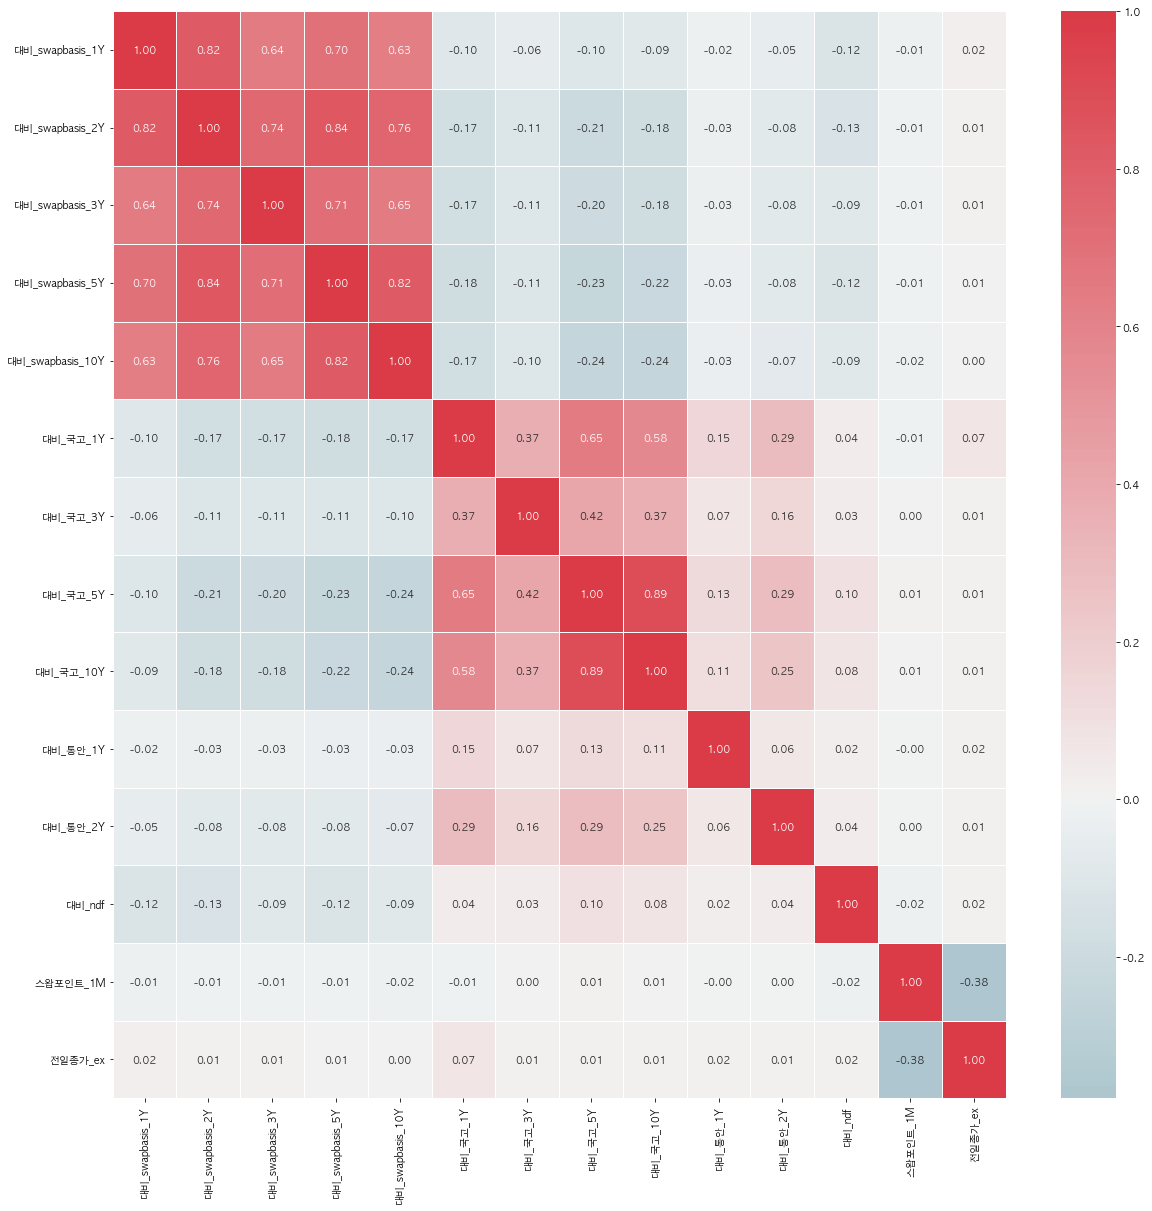

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns   
import scipy as sp  
from matplotlib import rc 
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(20,20))

cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(data = x_scaled.corr(), annot=True, fmt = '.2f', linewidths=.5, cmap=cmap, center=0)

In [24]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
X_train = x_scaled

def feature_engineering_XbyVIF(X_train):
    vif = pd.DataFrame()
    vif["VIF_Factor"] = [variance_inflation_factor(X_train.values,i)
                         for i in range(X_train.shape[1])]
    vif["Feature"] = X_train.columns
    return vif
vif = feature_engineering_XbyVIF(X_train)
print(vif)

    VIF_Factor           Feature
0     3.153841   대비_swapbasis_1Y
1     5.916655   대비_swapbasis_2Y
2     2.407987   대비_swapbasis_3Y
3     4.771167   대비_swapbasis_5Y
4     3.272935  대비_swapbasis_10Y
5     1.834091          대비_국고_1Y
6     1.244156          대비_국고_3Y
7     5.825888          대비_국고_5Y
8     4.885528         대비_국고_10Y
9     1.024866          대비_통안_1Y
10    1.114140          대비_통안_2Y
11    1.028418            대비_ndf
12    1.169059          스왑포인트_1M
13    1.178150           전일종가_ex


In [25]:
import statsmodels.api as sm

feature_add = sm.add_constant(x_scaled, has_constant='add')

# sm OLS 적합
model = sm.OLS(y , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  종가_ex   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                 2.184e+04
Date:                Tue, 30 Aug 2022   Prob (F-statistic):               0.00
Time:                        18:36:21   Log-Likelihood:                -7424.5
No. Observations:                2459   AIC:                         1.488e+04
Df Residuals:                    2444   BIC:                         1.497e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             1134.8939      0.100   1.13e+04      0.000    1134.697    1135.090
대비_swapbasis_1Y     -1.2070      0.178     -6.781      0.000      -1.556      -0.858
대비_swapbasis_2Y      0.0185      0.244      0.076      0.940      -0.460       0.497
대비_swapbasis_3Y     -0.2019      0.156     -1.298      0.194      -0.507       0.103
대비_swapbasis_5Y      0.2633      0.219      1.203      0.229      -0.166       0.693
대비_swapbasis_10Y     0.1536      0.181      0.847      0.397      -0.202       0.509
대비_국고_1Y             0.0663      0.136      0.489      0.625      -0.200       0.333
대비_국고_3Y            -0.2895      0.112     -2.589      0.010      -0.509      -0.070
대비_국고_5Y             0.2421      0.242      1.001      0.317      -0.232       0.717
대비_국고_10Y           -0.1367      0.222     -0.617      0.537      -0.571       0.298
대비_통안_1Y            -0.0473      0.101     -0.466      0.641      -0.246       0.152
대비_통안_2Y             0.0544      0.106      0.514      0.607      -0.153       0.262
대비_ndf               2.4767      0.102     24.367      0.000       2.277       2.676
스왑포인트_1M            -0.1090      0.108     -1.005      0.315      -0.321       0.104
전일종가_ex             55.2928      0.109    508.247      0.000      55.079      55.506
==============================================================================
Omnibus:                       69.473   Durbin-Watson:                   2.661
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              166.713
Skew:                           0.067   Prob(JB):                     6.29e-37
Kurtosis:                       4.269   Cond. No.                         6.54
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
x_scaled.drop(['대비_swapbasis_2Y', '대비_swapbasis_3Y', '대비_swapbasis_5Y'], axis=1, inplace=True)

feature_add = sm.add_constant(x_scaled, has_constant='add')

# sm OLS 적합
model = sm.OLS(y , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  종가_ex   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                 2.780e+04
Date:                Tue, 30 Aug 2022   Prob (F-statistic):               0.00
Time:                        18:36:21   Log-Likelihood:                -7425.9
No. Observations:                2459   AIC:                         1.488e+04
Df Residuals:                    2447   BIC:                         1.495e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             1134.8939      0.100   1.13e+04      0.000    1134.697    1135.090
대비_swapbasis_1Y     -1.1942      0.130     -9.189      0.000      -1.449      -0.939
대비_swapbasis_10Y     0.2435      0.133      1.833      0.067      -0.017       0.504
대비_국고_1Y             0.0678      0.136      0.500      0.617      -0.198       0.334
대비_국고_3Y            -0.2885      0.112     -2.582      0.010      -0.508      -0.069
대비_국고_5Y             0.2407      0.242      0.996      0.319      -0.233       0.715
대비_국고_10Y           -0.1386      0.221     -0.626      0.531      -0.573       0.296
대비_통안_1Y            -0.0478      0.101     -0.471      0.637      -0.247       0.151
대비_통안_2Y             0.0549      0.106      0.519      0.604      -0.152       0.262
대비_ndf               2.4705      0.101     24.356      0.000       2.272       2.669
스왑포인트_1M            -0.1090      0.108     -1.006      0.315      -0.321       0.104
전일종가_ex             55.2917      0.109    508.292      0.000      55.078      55.505
==============================================================================
Omnibus:                       69.522   Durbin-Watson:                   2.663
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              167.333
Skew:                           0.064   Prob(JB):                     4.61e-37
Kurtosis:                       4.272   Cond. No.                         5.42
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
x_scaled.drop(['대비_통안_1Y'], axis=1, inplace=True)

from statsmodels.stats.outliers_influence import variance_inflation_factor
X_train = x_scaled
def feature_engineering_XbyVIF(X_train):
    vif = pd.DataFrame()
    vif["VIF_Factor"] = [variance_inflation_factor(X_train.values,i)
                         for i in range(X_train.shape[1])]
    vif["Feature"] = X_train.columns
    return vif
vif = feature_engineering_XbyVIF(X_train)
print(vif)

   VIF_Factor           Feature
0    1.681182   대비_swapbasis_1Y
1    1.756444  대비_swapbasis_10Y
2    1.816782          대비_국고_1Y
3    1.242193          대비_국고_3Y
4    5.810423          대비_국고_5Y
5    4.881150         대비_국고_10Y
6    1.113397          대비_통안_2Y
7    1.024070            대비_ndf
8    1.169015          스왑포인트_1M
9    1.177919           전일종가_ex


In [28]:
import statsmodels.api as sm

feature_add = sm.add_constant(x_scaled, has_constant='add')

# sm OLS 적합
model = sm.OLS(y , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  종가_ex   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                 3.059e+04
Date:                Tue, 30 Aug 2022   Prob (F-statistic):               0.00
Time:                        18:36:22   Log-Likelihood:                -7426.0
No. Observations:                2459   AIC:                         1.487e+04
Df Residuals:                    2448   BIC:                         1.494e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             1134.8939      0.100   1.13e+04      0.000    1134.697    1135.090
대비_swapbasis_1Y     -1.1941      0.130     -9.190      0.000      -1.449      -0.939
대비_swapbasis_10Y     0.2432      0.133      1.832      0.067      -0.017       0.504
대비_국고_1Y             0.0625      0.135      0.463      0.643      -0.202       0.327
대비_국고_3Y            -0.2888      0.112     -2.586      0.010      -0.508      -0.070
대비_국고_5Y             0.2383      0.242      0.987      0.324      -0.235       0.712
대비_국고_10Y           -0.1385      0.221     -0.626      0.532      -0.573       0.296
대비_통안_2Y             0.0544      0.106      0.515      0.607      -0.153       0.262
대비_ndf               2.4698      0.101     24.355      0.000       2.271       2.669
스왑포인트_1M            -0.1092      0.108     -1.008      0.314      -0.322       0.103
전일종가_ex             55.2912      0.109    508.390      0.000      55.078      55.504
==============================================================================
Omnibus:                       69.374   Durbin-Watson:                   2.663
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              166.871
Skew:                           0.063   Prob(JB):                     5.81e-37
Kurtosis:                       4.270   Cond. No.                         5.40
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
x_scaled.drop(['대비_통안_2Y','대비_국고_1Y' ], axis=1, inplace=True)

feature_add = sm.add_constant(x_scaled, has_constant='add')

# sm OLS 적합
model = sm.OLS(y , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  종가_ex   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                 3.827e+04
Date:                Tue, 30 Aug 2022   Prob (F-statistic):               0.00
Time:                        18:36:22   Log-Likelihood:                -7426.3
No. Observations:                2459   AIC:                         1.487e+04
Df Residuals:                    2450   BIC:                         1.492e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             1134.8939      0.100   1.13e+04      0.000    1134.697    1135.090
대비_swapbasis_1Y     -1.1979      0.130     -9.230      0.000      -1.452      -0.943
대비_swapbasis_10Y     0.2447      0.133      1.844      0.065      -0.016       0.505
대비_국고_3Y            -0.2787      0.110     -2.524      0.012      -0.495      -0.062
대비_국고_5Y             0.2912      0.227      1.282      0.200      -0.154       0.736
대비_국고_10Y           -0.1396      0.221     -0.631      0.528      -0.574       0.294
대비_ndf               2.4686      0.101     24.370      0.000       2.270       2.667
스왑포인트_1M            -0.1084      0.108     -1.000      0.317      -0.321       0.104
전일종가_ex             55.2960      0.108    510.485      0.000      55.084      55.508
==============================================================================
Omnibus:                       68.391   Durbin-Watson:                   2.664
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              164.199
Skew:                           0.056   Prob(JB):                     2.21e-36
Kurtosis:                       4.261   Cond. No.                         4.71
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [30]:
x_scaled.drop(['대비_국고_10Y', '스왑포인트_1M'], axis=1, inplace=True)

feature_add = sm.add_constant(x_scaled, has_constant='add')

# sm OLS 적합
model = sm.OLS(y , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  종가_ex   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                 5.103e+04
Date:                Tue, 30 Aug 2022   Prob (F-statistic):               0.00
Time:                        18:36:22   Log-Likelihood:                -7427.0
No. Observations:                2459   AIC:                         1.487e+04
Df Residuals:                    2452   BIC:                         1.491e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             1134.8939      0.100   1.13e+04      0.000    1134.697    1135.090
대비_swapbasis_1Y     -1.2026      0.130     -9.280      0.000      -1.457      -0.948
대비_swapbasis_10Y     0.2528      0.132      1.911      0.056      -0.007       0.512
대비_국고_3Y            -0.2778      0.110     -2.516      0.012      -0.494      -0.061
대비_국고_5Y             0.1661      0.114      1.460      0.144      -0.057       0.389
대비_ndf               2.4715      0.101     24.411      0.000       2.273       2.670
전일종가_ex             55.3369      0.100    552.144      0.000      55.140      55.533
==============================================================================
Omnibus:                       68.046   Durbin-Watson:                   2.664
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              163.276
Skew:                           0.053   Prob(JB):                     3.51e-36
Kurtosis:                       4.258   Cond. No.                         2.29
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [31]:
x_scaled.drop(['대비_swapbasis_10Y'], axis=1, inplace=True)

feature_add = sm.add_constant(x_scaled, has_constant='add')

# sm OLS 적합
model = sm.OLS(y , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  종가_ex   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                 6.117e+04
Date:                Tue, 30 Aug 2022   Prob (F-statistic):               0.00
Time:                        18:36:22   Log-Likelihood:                -7428.8
No. Observations:                2459   AIC:                         1.487e+04
Df Residuals:                    2453   BIC:                         1.490e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1134.8939      0.100   1.13e+04      0.000    1134.697    1135.090
대비_swapbasis_1Y    -1.0482      0.101    -10.340      0.000      -1.247      -0.849
대비_국고_3Y           -0.2753      0.110     -2.492      0.013      -0.492      -0.059
대비_국고_5Y            0.1199      0.111      1.078      0.281      -0.098       0.338
대비_ndf              2.4713      0.101     24.396      0.000       2.273       2.670
전일종가_ex            55.3350      0.100    551.855      0.000      55.138      55.532
==============================================================================
Omnibus:                       71.199   Durbin-Watson:                   2.670
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              175.348
Skew:                           0.052   Prob(JB):                     8.39e-39
Kurtosis:                       4.304   Cond. No.                         1.61
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
df_scaled = pd.concat([x_scaled,y], axis=1)
df_scaled

,대비_swapbasis_1Y,대비_국고_3Y,대비_국고_5Y,대비_ndf,전일종가_ex,종가_ex
DateTime,,,,,,
2012-08-02,0.348741,-0.646622,-1.079749,0.293727,-0.149841,1131.7
2012-08-03,0.348741,-0.323869,-1.890219,0.686290,-0.056232,1134.8
2012-08-06,-0.350946,0.160261,0.000879,-1.669093,-0.000426,1129.0
2012-08-07,0.173819,-0.001116,0.000879,0.075636,-0.104837,1128.8
2012-08-08,-0.001103,-0.323869,-0.539435,0.206490,-0.108437,1128.3
...,...,...,...,...,...,...
2022-07-25,-0.700790,-0.969375,-1.890219,0.572883,3.207485,1313.7
2022-07-26,0.348741,-0.485246,-0.539435,0.189043,3.220086,1307.6
2022-07-27,0.348741,-0.485246,-1.349905,-0.098837,3.110275,1313.3


In [33]:
train = df_scaled[0:1945]
test = df_scaled[1945:]

def make_dataset(data, label, window_size=5):
    feature_list = []
    label_list = []
    for i in range(len(data) - window_size):
        feature_list.append(np.array(data.iloc[i:i+window_size]))
        label_list.append(np.array(label.iloc[i+window_size]))
    return np.array(feature_list), np.array(label_list)

feature_cols = ['대비_swapbasis_1Y', '대비_국고_3Y', '대비_국고_5Y', '대비_ndf', '전일종가_ex']
label_cols = ['종가_ex']

In [34]:
from sklearn.model_selection import train_test_split

train_feature = train[feature_cols]
train_label = train[label_cols]
test_feature = test[feature_cols]
test_label = test[label_cols]

train_feature, train_label = make_dataset(train_feature, train_label, 5)
x_train, x_valid, y_train, y_valid = train_test_split(train_feature, train_label, test_size=0.2)
x_train.shape, x_valid.shape

((1552, 5, 5), (388, 5, 5))

In [35]:
x_train

array([[[-1.10259799e-03,  6.44390855e-01,  1.08150645e+00,
         -8.49070297e-01, -1.45676778e+00],
        [-6.13329024e-01,  6.44390855e-01,  2.43229086e+00,
         -3.60546409e-01, -1.42976516e+00],
        [ 8.63583201e-02,  3.21637599e-01,  5.41192681e-01,
          2.06490246e-01, -1.52157407e+00],
        [ 2.61280156e-01, -1.13075206e+00, -1.34990550e+00,
          3.37344859e-01, -1.43336551e+00],
        [-5.25868106e-01, -1.11565786e-03,  8.78916251e-04,
          1.73312740e+00, -1.24974769e+00]],

       [[ 6.98584746e-01, -1.11565786e-03,  5.41192681e-01,
         -9.10135783e-01,  2.28195755e-01],
        [-3.50946270e-01,  3.21637599e-01,  1.08150645e+00,
         -2.73310001e-01,  2.02993309e-01],
        [ 8.73506582e-01, -3.23868914e-01, -1.07974861e+00,
         -6.22255635e-01,  1.39987194e-01],
        [ 1.73819238e-01, -1.62492286e-01, -8.09591731e-01,
         -1.49461972e+00,  4.45779337e-02],
        [-1.10259799e-03, -1.11565786e-03,  8.78916251e-04,
  

In [36]:
test_feature, test_label = make_dataset(test_feature, test_label, 5)
test_feature.shape, test_label.shape

((509, 5, 5), (509, 1))

In [37]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.layers import LSTM


# 모델의 설정
model = Sequential()
model.add(LSTM(16, 
               input_shape=(train_feature.shape[1], train_feature.shape[2]), 
               activation='relu', 
               return_sequences=False)
          )
model.add(Dense(1))

# 모델의 컴파일: 모델학습을 위한 학습과정 설정단계
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])
early_stop = EarlyStopping(monitor='val_loss', patience=10)
modelpath = './'
checkpoint = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True, mode='auto')
# filename = os.path.join(file_path=model_path, 'tmp_checkpoint.h5')

# 모델의 실행
history = model.fit(x_train, y_train, 
                    epochs=200, 
                    batch_size=16,
                    validation_data=(x_valid, y_valid), 
                    callbacks=[early_stop, checkpoint])

# 테스트 정확도 출력                    
# print("\n Accuracy: %.4f" % model.evaluate(x_valid, y_valid))  

2022-08-30 18:36:25.007145: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/200
89/97 [==========================>...] - ETA: 0s - loss: 1265472.1250 - mae: 1123.8132
Epoch 1: val_loss improved from inf to 1266381.62500, saving model to ./
INFO:tensorflow:Assets written to: ./assets
97/97 [==============================] - 3s 25ms/step - loss: 1266702.8750 - mae: 1124.3540 - val_loss: 1266381.6250 - val_mae: 1124.1815
Epoch 2/200
92/97 [===========================>..] - ETA: 0s - loss: 1256612.6250 - mae: 1119.9091
Epoch 2: val_loss improved from 1266381.62500 to 1208675.25000, saving model to ./
INFO:tensorflow:Assets written to: ./assets
97/97 [==============================] - 2s 20ms/step - loss: 1255359.2500 - mae: 1119.3546 - val_loss: 1208675.2500 - val_mae: 1098.3354
Epoch 3/200
89/97 [==========================>...] - ETA: 0s - loss: 798446.6250 - mae: 826.6098
Epoch 3: val_loss improved from 1208675.25000 to 425653.00000, saving model to ./
INFO:tensorflow:Assets written to: ./assets
97/97 [==============================] - 2s 18ms/step - los

16/16 [==============================] - 0s 1ms/step


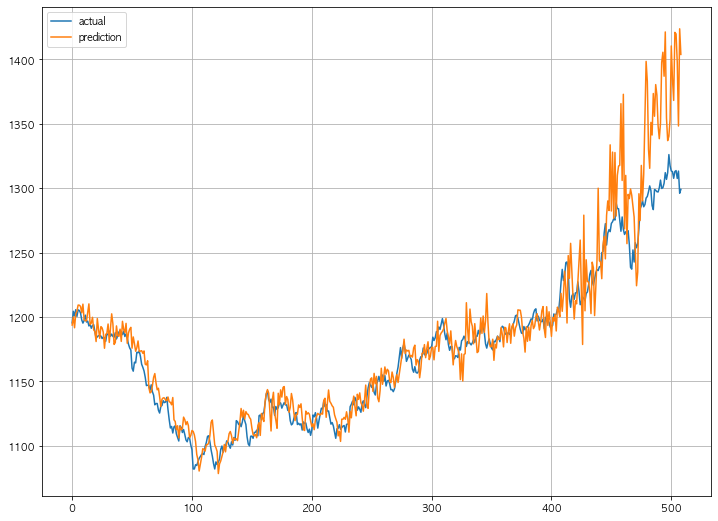

In [38]:
pred = model.predict(test_feature)

import matplotlib.pyplot as plt
plt.figure(figsize=(12, 9))
plt.plot(test_label, label='actual')
plt.plot(pred, label='prediction')
plt.legend()
plt.grid()